# 0.) Import and Clean data

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [7]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [8]:
df = pd.read_csv("/content/gdrive/MyDrive/Country-data.csv", sep = ",")

In [9]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [10]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [11]:
names = df[["country"]]
X = df.drop(["country"], axis = 1)



In [12]:
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

# 1.) Fit a kmeans Model with any Number of Clusters

In [16]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X_scaled) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

# 2.) Pick two features to visualize across

In [17]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

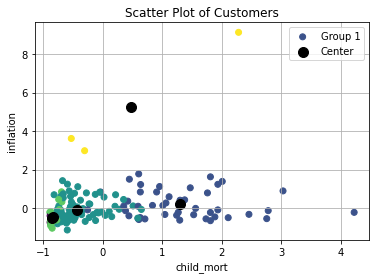

In [19]:
# CHANGE THESE BASED ON WHICH IS INTERESTING TO YOU
x1_index = 0
x2_index = 5


plt.scatter(X_scaled[:, x1_index], X_scaled[:, x2_index], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, x1_index], kmeans.cluster_centers_[:, x2_index], marker='o', color='black', s=100)

plt.xlabel(X.columns[x1_index])
plt.ylabel(X.columns[x2_index])
plt.title('Scatter Plot of Customers')
plt.legend(["Group 1", "Center", "Group 2"])
plt.grid()
plt.show()

# 3.) Check a range of k-clusters and visualize to find the elbow. Test 30 different random starting places for the centroid means
 

In [24]:
WCSSs=[]
Ks=range(1,10)
for k in Ks:
  kmeans=KMeans(n_clusters=k,n_init=30)
  kmeans.fit(X_scaled)
  WCSSs.append(kmeans.inertia_)

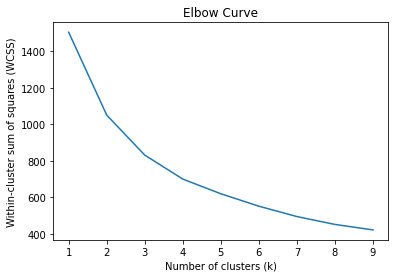

In [26]:
# Plot the elbow curve
plt.plot(Ks, WCSSs)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-cluster sum of squares (WCSS)')
plt.title('Elbow Curve')
plt.show()

# 4.) Use the above work and economic critical thinking to choose a number of clusters. Explain why you chose the number of clusters and fit a model accordingly.

I would like to choose 3 as a number of clusters.At k=3, the curve starts to level off, forming an "elbow" shape. This point represents the optimal number of clusters, beyond which adding more clusters does not significantly improve the model's fit to the data.

In [27]:
#fitting
best = KMeans(n_clusters=3)
best.fit(X_scaled) 

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

# 5.) Create a list of the countries that are in each cluster. Write interesting things you notice. Hint : Use .predict(method)

In [32]:
clusters = best.fit_predict(X_scaled)

# Create a new dataframe with country names and their corresponding cluster labels
country_clusters = pd.DataFrame({'country': df['country'], 'cluster': clusters})

# Group the countries by cluster and obtain the list of countries in each cluster
cluster_lists = country_clusters.groupby('cluster')['country'].apply(list)

for i, lst in enumerate(cluster_lists):
    print(f'Cluster {i}: {lst}')

Cluster 0: ['Afghanistan', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', "Cote d'Ivoire", 'Equatorial Guinea', 'Eritrea', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Mozambique', 'Namibia', 'Niger', 'Nigeria', 'Pakistan', 'Rwanda', 'Senegal', 'Sierra Leone', 'South Africa', 'Sudan', 'Tanzania', 'Timor-Leste', 'Togo', 'Uganda', 'Yemen', 'Zambia']
Cluster 1: ['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brunei', 'Canada', 'Cyprus', 'Czech Republic', 'Denmark', 'Finland', 'France', 'Germany', 'Greece', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Japan', 'Kuwait', 'Luxembourg', 'Malta', 'Netherlands', 'New Zealand', 'Norway', 'Portugal', 'Qatar', 'Singapore', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sweden', 'Switzerland', 'United Arab Emirates', '

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 seems to be comprised of mostly African countries, while Cluster 1 contains mainly Western countries such as Australia, Canada, United States, and most European countries. Cluster 2, on the other hand, appears to be a mix of countries from different regions.

#6.) Create a table of Descriptive Statistics. Rows being the Cluster number and columns being all the features. Values being the mean of the centroid. Use the nonscaled X values for interprotation

In [33]:
best.fit(X)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [42]:
# Extract the centroids and create a dataframe of mean values
centroids = pd.DataFrame(best.cluster_centers_, columns=X.columns)
means_df = pd.concat([centroids], axis=0)

In [46]:
# Print the resulting table
print(means_df)

   child_mort    exports    health    imports        income  inflation  \
0   47.389844  35.865617  6.332031  45.921609   8569.242187   8.957648   
1    8.800000  49.978125  8.991563  46.021875  37621.875000   3.383312   
2    6.228571  96.442857  5.712857  68.571429  80342.857143   6.388714   

   life_expec  total_fer          gdpp    Cluster  
0   67.873437   3.263359   4438.390625  Cluster 0  
1   79.156250   1.944688  35587.500000  Cluster 1  
2   80.285714   1.767143  65442.857143  Cluster 2  


# Q7.) Write an observation about the descriptive statistics.

Cluster 0 has the highest child mortality rate and the lowest income, GDP per capita, and life expectancy. This suggests that the countries in this cluster may be in need of aid and assistance to improve their basic living standards.

Cluster 1 has the lowest child mortality rate, highest income, and highest GDP per capita compared to the other two clusters. This suggests that the countries in this cluster are developed country.

Cluster 2 has the lowest total fertility rate compared to the other two clusters. This suggests that the countries in this cluster may have better access to family planning services or have a more educated population. 